# Cascade Refrigeration Cycle Example

## Imports

In [1]:
from thermostate import State, Q_, units, EnglishEngineering as EE
from thermostate.plotting import IdealGas, VaporDome

---

## Definitions

In [2]:
sub_hiT = 'R22'
sub_loT = 'R134A'

T_1 = Q_(-30.0, 'degF')
x_1 = Q_(1.0, 'dimensionless')

p_2 = Q_(50.0, 'psi')

p_3 = p_2
x_3 = Q_(0.0, 'dimensionless')

delta_T_5 = Q_(-5.0, 'delta_degF')
x_5 = Q_(1.0, 'dimensionless')

p_6 = Q_(250.0, 'psi')

p_7 = p_6
x_7 = Q_(0.0, 'dimensionless')

Qdot_in = Q_(20.0, 'refrigeration_tons')

---

## Problem Statement

A two-stage cascade vapor-compression refrigeration system operates with R22 as the working fluid in the high-temperature cycle and R134A in the low-temperature cycle. For the R134A cycle, the working fluid enters the compressor as a saturated vapor at -30.0 fahrenheit and is compressed isentropically to 50 lbf/in.<sup>2</sup> Saturated liquid leaves the intermediate heat exchanger at 50 lbf/in.<sup>2</sup> and enters the expansion valve. For the R22 cycle, the working fluid enters the compressor as saturated vapor at a temperature 5 fahrenheit below that of the condensing temperature of the R134A in the intermediate heat exchanger. The R22 is compressed isentropically to 250 lbf/in.<sup>2</sup> Saturated liquid then enters the expansion valve at 250 lbf/in.<sup>2</sup>. The refrigerating capacity of the cascade system is 20 ton_of_refrigeration. Determine

1. the power input to each compressor, in BTU/min
2. the overall coefficient of performance of the cascade cycle

---

## Solution

### 1. the power input to each compressor

The power input to each compressor can be found by

$$\dot{W}_{cv} = \dot{m}(h_i - h_e)$$

To find the enthalpies, we need to fix all of the states.

The cascade refrigeration cycle is consistes of two smaller cycles both with 4 processes:

    R22 cycle:
    1. Isentropic compression
    2. Isobaric heat exchange
    3. Isoenthalpic expansion
    4. Isobaric heat exchange
    
    R134A cycle:
    1. Isentropic compression
    2. Isobaric heat exchange
    3. Isoenthalpic expansion
    4. Isobaric heat exchange
    
The following properties are used to fix the four states:

State | Property 1 | Property 2 
:-----:|:-----:|:-----:
1|$$x_1 $$|$$T_1 $$
2|$$p_2 $$|$$s_2=s_1 $$
3|$$p_3=p_2 $$|$$x_3 $$
4|$$p_4=p_1 $$|$$h_4=h_3 $$
5|$$T_5=T_3 + \Delta T_5 $$|$$x_5 $$
6|$$p_6 $$|$$s_6=s_5 $$
7|$$p_7=p_6 $$|$$x_7 $$
8|$$p_8=p_5 $$|$$h_8=h_7 $$

In [3]:
st_1 = State(sub_loT, x=x_1, T=T_1)
h_1 = st_1.h.to(EE.h)
s_1 = st_1.s.to(EE.s)
p_1 = st_1.p.to(EE.p)

s_2 = s_1
st_2 = State(sub_loT, p=p_2, s=s_1)
h_2 = st_2.h.to(EE.h)
T_2 = st_2.T.to(EE.T)

st_3 = State(sub_loT, p=p_3, x=x_3)
T_3 = st_3.T.to(EE.T)
h_3 = st_3.h.to(EE.h)
s_3 = st_3.s.to(EE.s)

h_4 = h_3
p_4 = p_1
st_4 = State(sub_loT, p=p_4, h=h_4)
T_4 = st_4.T.to(EE.T)
s_4 = st_4.s.to(EE.s)
x_4 = st_4.x

T_5 = T_3 + delta_T_5
st_5 = State(sub_hiT, T=T_5, x=x_5)
h_5 = st_5.h.to(EE.h)
p_5 = st_5.p.to(EE.p)
s_5 = st_5.s.to(EE.s)

s_6 = s_5
st_6 = State(sub_hiT, s=s_6, p=p_6)
h_6 = st_6.h.to(EE.h)
T_6 = st_6.T.to(EE.T)

st_7 = State(sub_hiT, p=p_7, x=x_7)
T_7 = st_7.T.to(EE.T)
h_7 = st_7.h.to(EE.h)
s_7 = st_7.s.to(EE.s)

h_8 = h_7
p_8 = p_5
st_8 = State(sub_hiT, p=p_8, h=h_8)
T_8 = st_8.T.to(EE.T)
s_8 = st_8.s.to(EE.s)
x_8 = st_8.x

Plotting the T-s diagrams of both cycles,

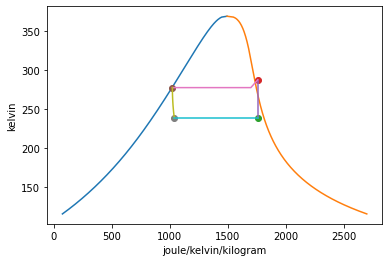

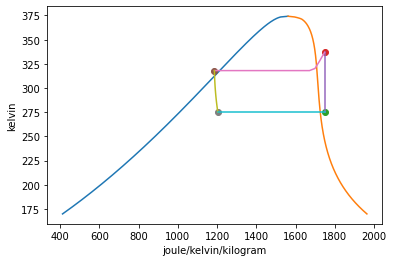

In [4]:
R22_vapordome = VaporDome(sub_hiT, ('s', 'T'))
R134A_vapordome = VaporDome(sub_loT, ('s', 'T'))

R22_vapordome.add_process(st_1, st_2, 'isentropic')
R22_vapordome.add_process(st_2, st_3, 'isobaric')
R22_vapordome.add_process(st_3, st_4, 'isoenthalpic') 
R22_vapordome.add_process(st_4, st_1, 'isobaric')

R134A_vapordome.add_process(st_5, st_6, 'isentropic')
R134A_vapordome.add_process(st_6, st_7, 'isobaric')
R134A_vapordome.add_process(st_7, st_8, 'isoenthalpic')
R134A_vapordome.add_process(st_8, st_5, 'isobaric')

Summarizing the states:


| State |           T            |           p            |           h            |           s            |           x            |     phase      |
|-------|------------------------|------------------------|------------------------|------------------------|------------------------|----------------|
|     1 | -30.00 degF | 9.86 pound_force_per_square_inch | 162.30 btu / pound | 0.4196 btu / degR / pound | 100.00% | twophase |
|     2 | 58.23 degF | 50.00 pound_force_per_square_inch | 176.42 btu / pound | 0.4196 btu / degR / pound |          ---           | gas |
|     3 | 40.27 degF | 50.00 pound_force_per_square_inch | 88.65 btu / pound | 0.2442 btu / degR / pound | 0.00% | twophase |
|     4 | -30.00 degF | 9.86 pound_force_per_square_inch | 88.65 btu / pound | 0.2482 btu / degR / pound | 22.96% | twophase |
|     5 | 35.27 degF | 76.59 pound_force_per_square_inch | 174.42 btu / pound | 0.4175 btu / degR / pound | 100.00% | twophase |
|     6 | 146.75 degF | 250.00 pound_force_per_square_inch | 187.12 btu / pound | 0.4175 btu / degR / pound |          ---           | gas |
|     7 | 112.76 degF | 250.00 pound_force_per_square_inch | 110.14 btu / pound | 0.2834 btu / degR / pound | 0.00% | twophase |
|     8 | 35.27 degF | 76.59 pound_force_per_square_inch | 110.14 btu / pound | 0.2876 btu / degR / pound | 26.55% | twophase |

The mass flow rate of the R134a is found from the refrigeration capacity

$$\dot{m}_{\text{R134A}} = \frac{\dot{Q}_{in}}{h_1 - h_4}$$

while the mass flow rate of the R22 is found from the intermediate heat exchanger

$$\dot{m}_{\text{R22}} = \frac{\dot{m}_{\text{R134A}}\left(h_2 - h_3\right)}{h_5 - h_8}$$

In [5]:
mdot_r134a = (Qdot_in/(h_1 - h_4)).to('lb/min')
Wdot_loT = (mdot_r134a*(h_1 - h_2)).to('BTU/min')

mdot_r22 = mdot_r134a*(h_2 - h_3)/(h_5 - h_8)
Wdot_hiT = (mdot_r22*(h_5 - h_6)).to('BTU/min')

<div class="alert alert-success">

**Answer:** The compressor work for the low-temperature cycle is $\dot{W}_{\text{R134A}} =$ -766.52 btu / minute and the work for the high temperature cycle is $\dot{W}_{\text{R22}} =$ -941.38 btu / minute

</div>

### 2. The coefficient of performance

The coefficient of performance of this refrigeration cycle is defined as

$$\beta = \frac{\dot{Q}_{in}}{\lvert\dot{W}_{\text{R134A}} + \dot{W}_{\text{R22}}\rvert}$$

In [6]:
beta = (Qdot_in/abs(Wdot_loT + Wdot_hiT)).to('dimensionless')
beta_max = (T_4/(T_7 - T_4)).to('dimensionless')

<div class="alert alert-success">

**Answer:** The coefficient of performance is $\beta =$ 2.34, while the maximum coefficient of performance for a refrigeration cycle operating between $T_C =$ -30.00 degF and $T_H =$ 112.76 degF is $\beta_{\text{max}} =$ 3.01 dimensionless. The actual cycle has a lower COP, so it is possible.

</div>